In [5]:
### IMPORTS ###

from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [6]:
class PimaDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.features = self.data.iloc[:, :-1].values
        self.output = self.data.iloc[:, -1].values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.features[idx], self.output[idx]
    

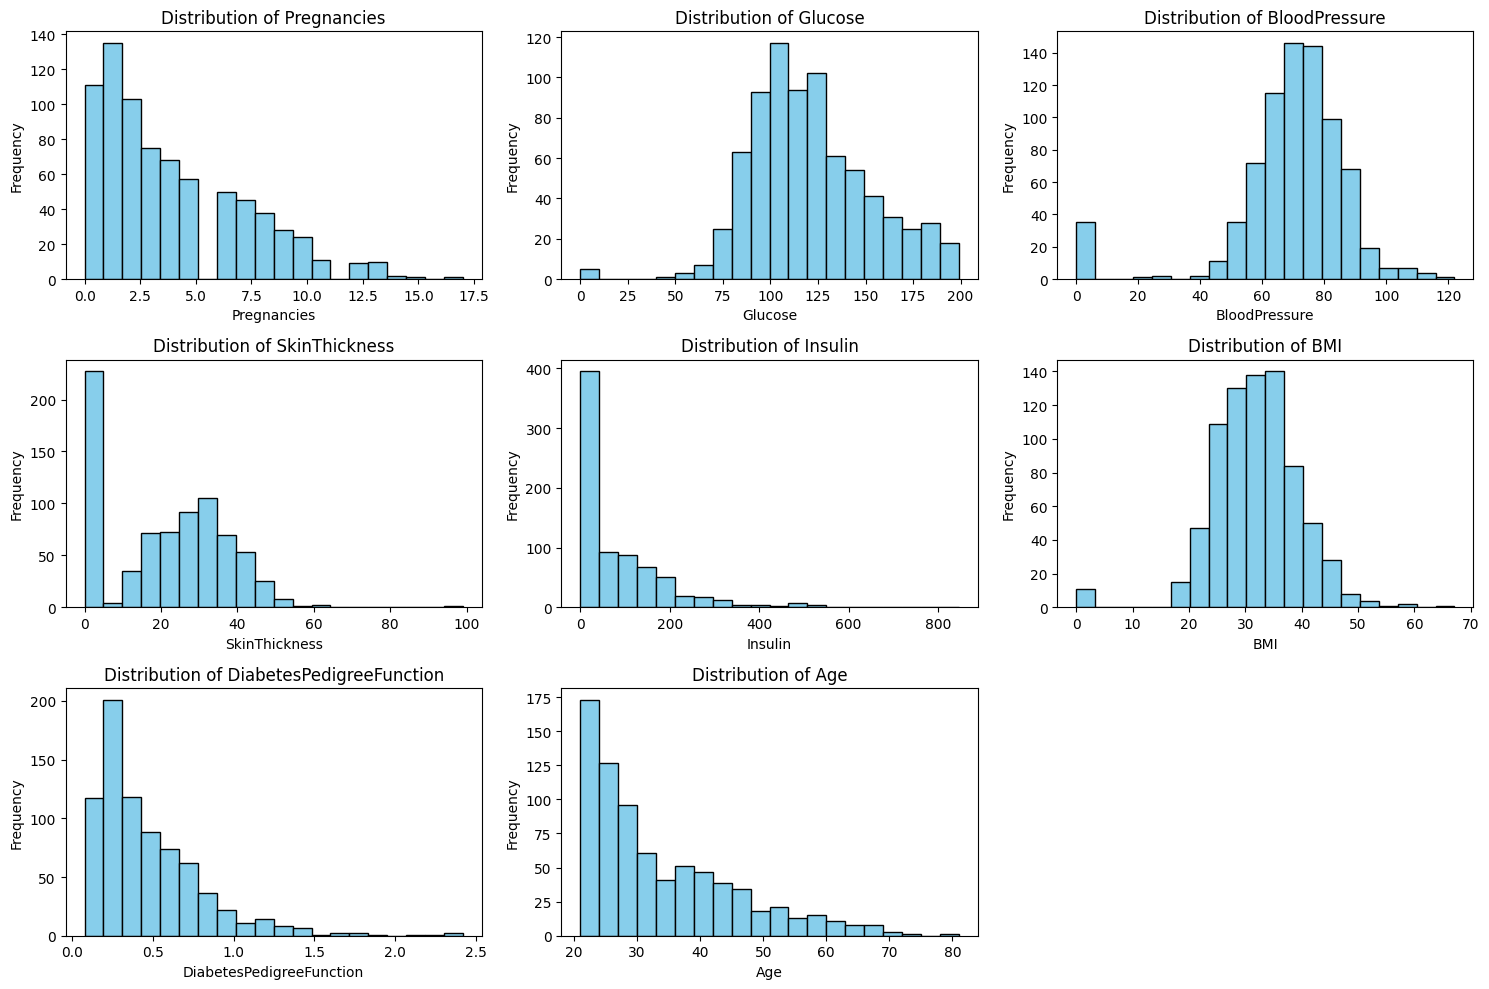

In [11]:
dataset = PimaDataset('../data/diabetes.csv') 

data_features = dataset.data.columns[:-1] 
plt.figure(figsize=(15, 10))

for i, feature in enumerate(data_features, 1):
    plt.subplot(3, 3, i)
    plt.hist(dataset.data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


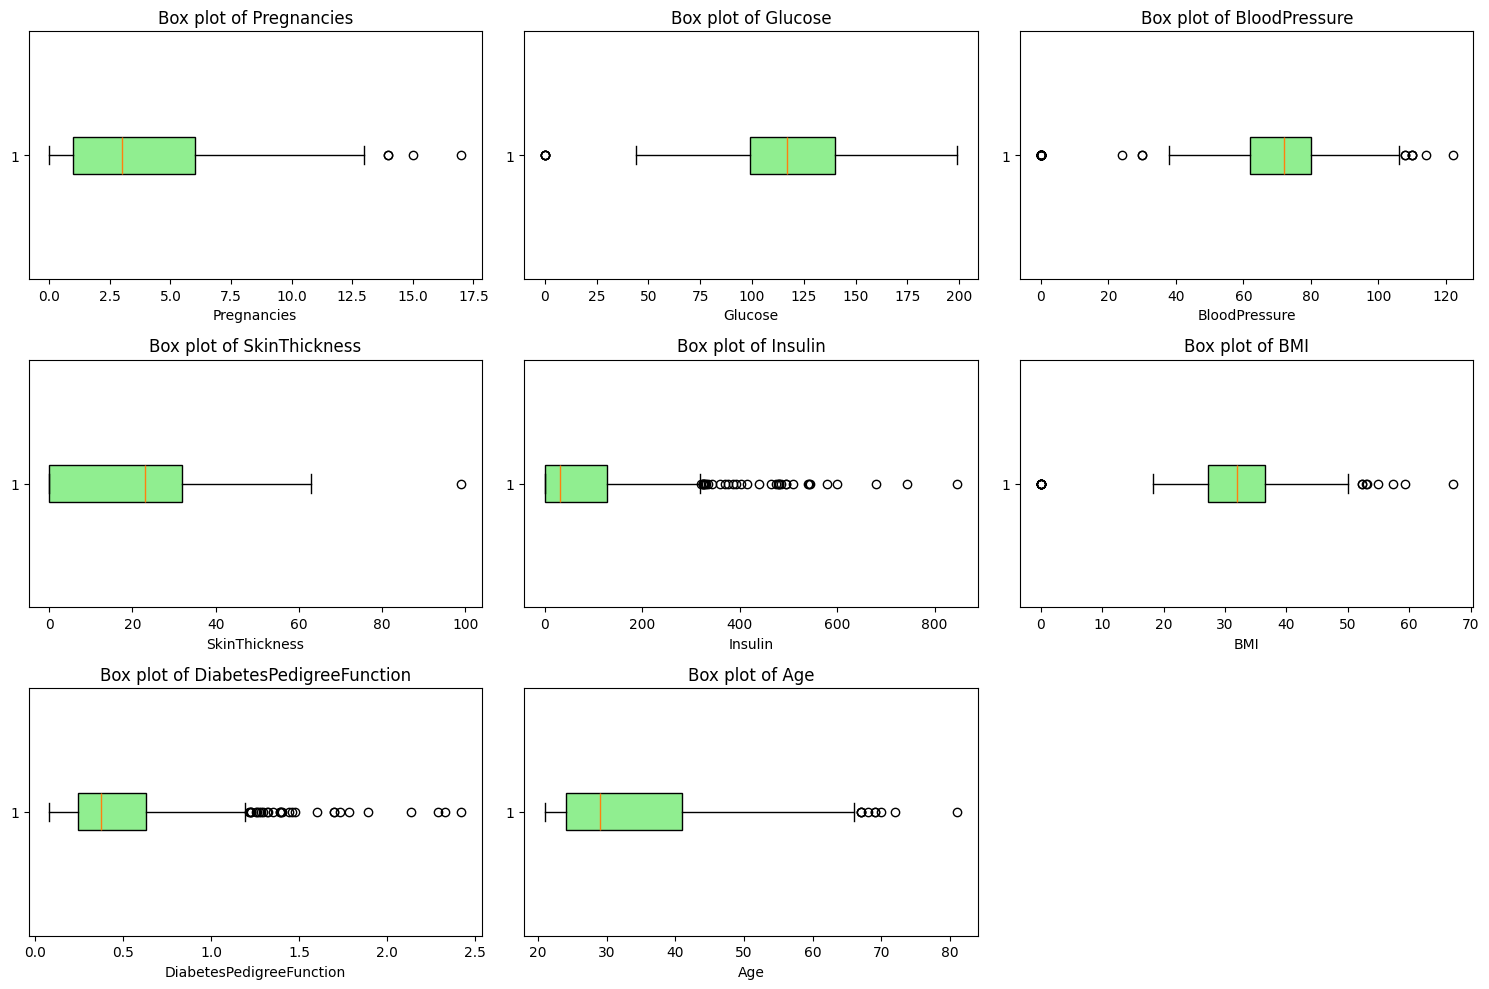

In [12]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(data_features, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(dataset.data[feature].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightgreen'))
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

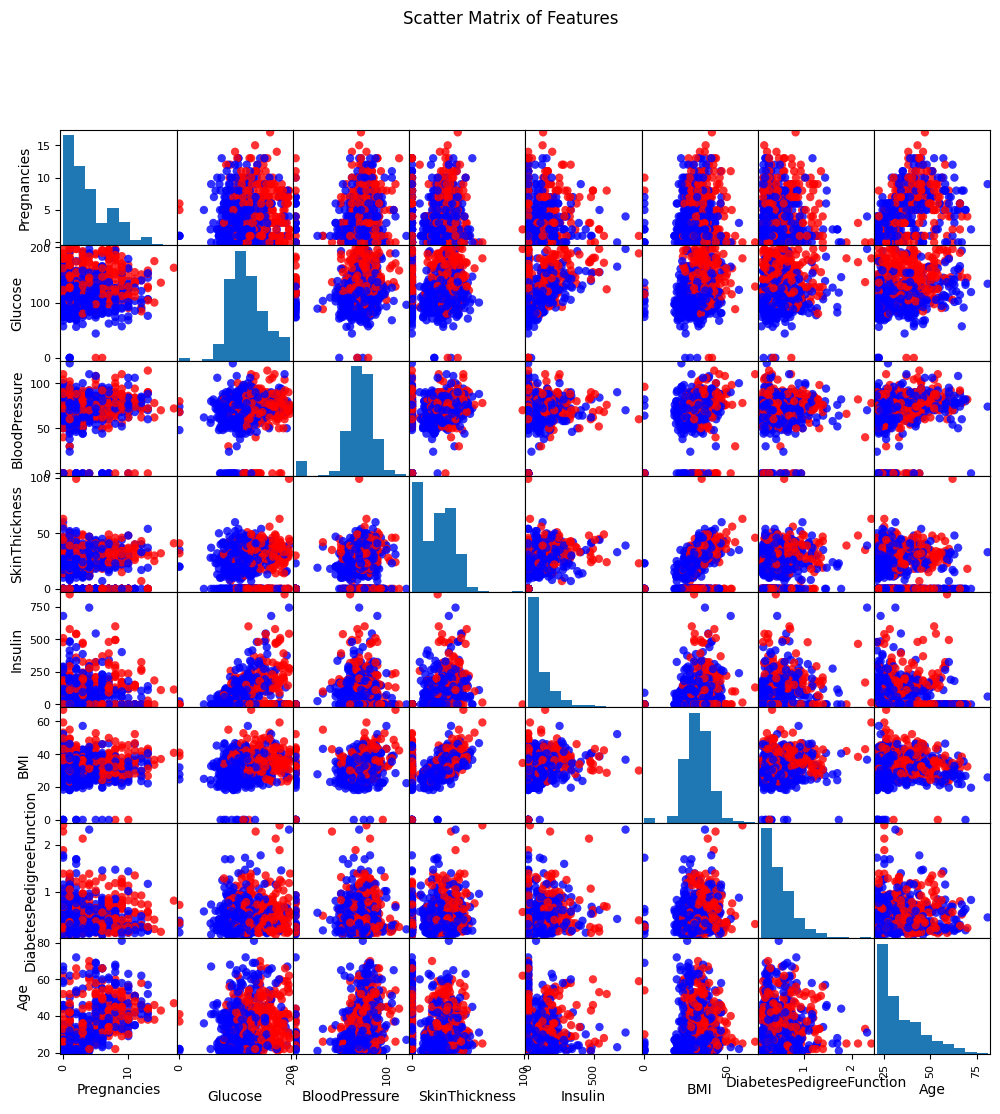

In [14]:
from pandas.plotting import scatter_matrix

colors = {0: "blue", 1: "red"}
outcome_colors = dataset.data['Outcome'].map(colors)

scatter_matrix(dataset.data[data_features], figsize=(12, 12), marker='o', c=outcome_colors, alpha=0.8)
plt.suptitle("Scatter Matrix of Features")
plt.show()

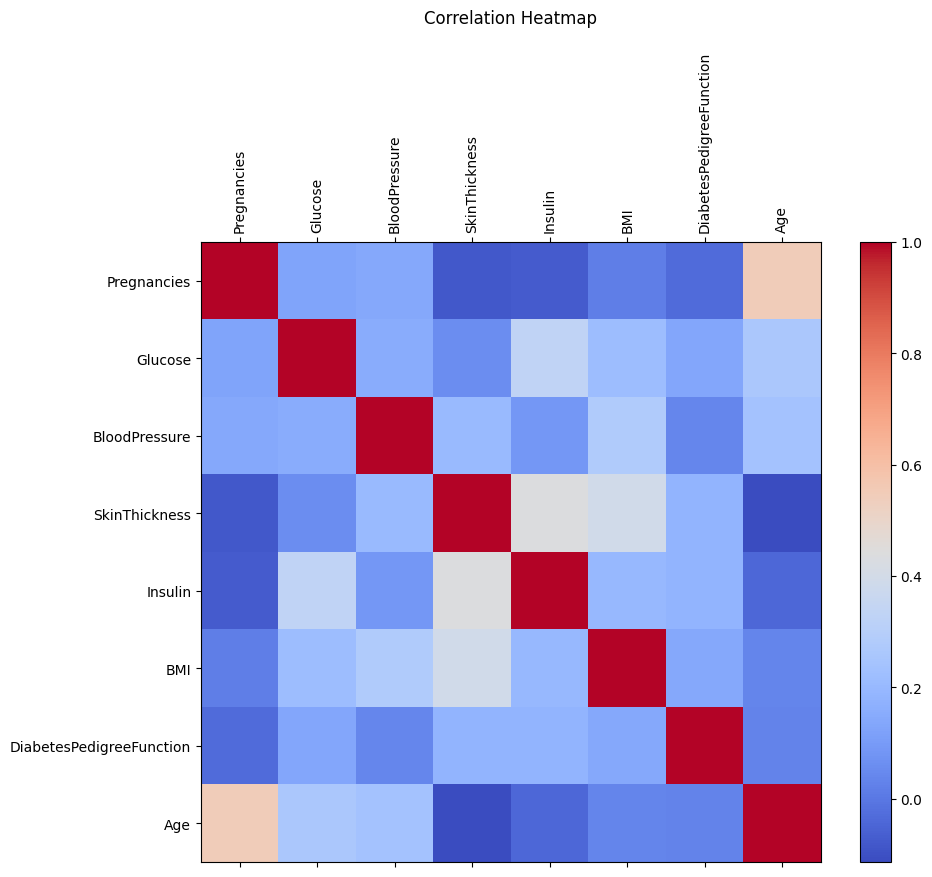

In [17]:
correlation_matrix = dataset.data.corr()

correlation_matrix = correlation_matrix.iloc[:-1, :-1]

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap", pad=20)
plt.show()

In [19]:
print(dataset.data.describe()) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  